# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sp
from scipy.stats import norm
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
import mne
import pylsl
import stream_viewer
import PyQt5
import pyxdf
import autoreject
from autoreject import AutoReject
from pyprep.prep_pipeline import PrepPipeline
import sys
import json
sys.path.append(r"C:\Users\Jake\App-SigVisualizer-master")

import os
import time
import random
from pylsl import StreamInfo, StreamOutlet, resolve_stream, StreamInlet

from mne import Annotations

import fooof
from fooof import FOOOF
from fooof import FOOOFGroup

from mne.time_frequency import psd_array_welch

import json


from mne.preprocessing import ICA
from autoreject import AutoReject
from pyxdf import load_xdf
from mne.preprocessing import compute_current_source_density

import io
from winsound import Beep

from IPython.display import Audio, display


C:\Users\Jake\AppData\Local\Temp\ipykernel_17136\3507962607.py:28: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  import fooof


# Experiment 1 -- prompting every 6-15 seconds for user input

## recording

### before recording from labrecorder, run this!:

In [12]:

# Create the marker stream
info = StreamInfo(name='MarkerStream', type='Markers', channel_count=1, nominal_srate=0, channel_format='string')
outlet = StreamOutlet(info)

# Find all available streams
streams = resolve_stream()

inlet = StreamInlet(streams[0])

# Print details of each stream found
for i, stream in enumerate(streams):
    print(f"Stream {i + 1}:")
    print(f"  Name: {stream.name()}")
    print(f"  Type: {stream.type()}")
    print(f"  Source ID: {stream.source_id()}")
    print(f"  Channels: {stream.channel_count()}")
    print(f"  Sampling Rate: {stream.nominal_srate()} Hz")
    print()

Stream 1:
  Name: MarkerStream
  Type: Markers
  Source ID: 
  Channels: 1
  Sampling Rate: 0.0 Hz

Stream 2:
  Name: Neuroeducation EEG
  Type: EEG
  Source ID: neuroEdu_JakeTear
  Channels: 19
  Sampling Rate: 256.0 Hz



### while recording:

In [ ]:

# Momentary assessment paradigm
try:
    for count in range(1, 21):  #How many times to prompt -- 
        # Wait for a random interval between 6 and 10 seconds
        interval = random.uniform(5, 9)
        time.sleep(interval)

        # Send a marker
        marker_name = f"Marker_{count}"
        metadata = json.dumps({"marker": marker_name})
        outlet.push_sample([metadata])
        print(f"Sent initial marker: {metadata}")
        Beep(300, 500)
        # Prompt the user for input
        print(f"Marker: {marker_name} - Please input a number (1-10):")

        # Validate user input
        while True:
            try:
                user_input = int(input())
                if 1 <= user_input <= 10:
                    Beep(300, 200)
                    break
                else:
                    print("Please enter a valid number between 1 and 10.")
            except ValueError:
                print("Invalid input. Please enter a number between 1 and 10.")

        # Send an update tied to the original marker
        update_metadata = json.dumps({"marker update": marker_name, "user input": user_input})
        outlet.push_sample([update_metadata])
        print(f"Sent update tied to marker: {update_metadata}\n")
    Beep(300, 1000)
except KeyboardInterrupt:
    print("Momentary assessment paradigm terminated.")


Sent initial marker: {"marker": "Marker_1"}
Marker: Marker_1 - Please input a number (1-10):
Sent update tied to marker: {"marker update": "Marker_1", "user input": 7}

Sent initial marker: {"marker": "Marker_2"}
Marker: Marker_2 - Please input a number (1-10):
Sent update tied to marker: {"marker update": "Marker_2", "user input": 5}

Sent initial marker: {"marker": "Marker_3"}
Marker: Marker_3 - Please input a number (1-10):
Sent update tied to marker: {"marker update": "Marker_3", "user input": 3}

Sent initial marker: {"marker": "Marker_4"}
Marker: Marker_4 - Please input a number (1-10):
Sent update tied to marker: {"marker update": "Marker_4", "user input": 5}

Sent initial marker: {"marker": "Marker_5"}
Marker: Marker_5 - Please input a number (1-10):
Sent update tied to marker: {"marker update": "Marker_5", "user input": 8}

Sent initial marker: {"marker": "Marker_6"}
Marker: Marker_6 - Please input a number (1-10):
Sent update tied to marker: {"marker update": "Marker_6", "use

## analysis w/ preprocessing

2024-12-27 23:02:25,719 - pyxdf.pyxdf - INFO - Importing XDF file c:\Users\Jake\testing-learning2024\git-test\EMAData\Sub1_session1_block.xdf...
2024-12-27 23:02:25,857 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2024-12-27 23:02:25,927 - pyxdf.pyxdf - INFO -   performing jitter removal...


Processing file: Sub1_session1_block.xdf for subject: Sub1_session1_block
Creating RawArray with float64 data, n_channels=19, n_times=48672
    Range : 0 ... 48671 =      0.000 ...   190.121 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 16 components
Fitting ICA took 0.7s.


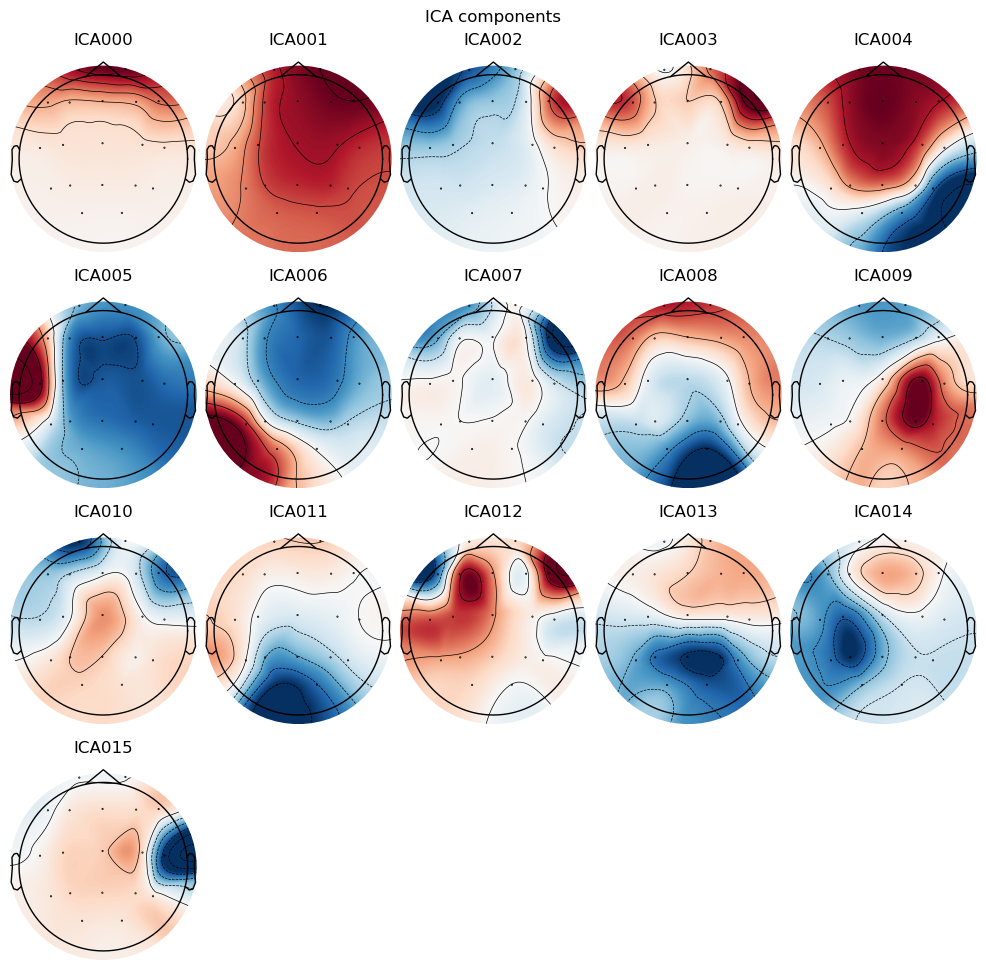

Using EOG channel: Fp1
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Removed notch frequencies (Hz):
     60.00 :  703 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/38 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:02:32,627 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T4'], 'bad_by_correlation': ['F8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T4', 'F8']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/38 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:02:34,544 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['C3', 'Cz', 'T4', 'F8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['C3', 'Cz', 'T4', 'F8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 15 sensor positions
Interpolating 4 sensors


2024-12-27 23:02:34,612 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/38 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:02:36,414 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T4'], 'bad_by_correlation': ['C3', 'Cz', 'T4', 'F8'], 'bad_by_SNR': ['T4'], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['C3', 'Cz', 'T4', 'F8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 15 sensor positions
Interpolating 4 sensors


2024-12-27 23:02:36,489 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/38 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:02:38,318 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T4'], 'bad_by_correlation': ['C3', 'Cz', 'T4', 'F8'], 'bad_by_SNR': ['T4'], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['C3', 'Cz', 'T4', 'F8']}
2024-12-27 23:02:38,319 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 15 sensor positions
Interpolating 4 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/38 [00:00<?,       ?it/s]


RANSAC done!
Found 4 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

1 by HF noise: ['T4']

4 by correlation: ['F8', 'T4', 'C3', 'Cz']

1 by SNR: ['T4']

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 15 sensor positions
Interpolating 4 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/38 [00:00<?,       ?it/s]


RANSAC done!
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 15 sensor positions
Interpolating 4 sensors
Not setting metadata
9 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 9 events and 1025 original time points ...
0 bad epochs dropped
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size

2024-12-27 23:02:44,874 - pyxdf.pyxdf - INFO - Importing XDF file c:\Users\Jake\testing-learning2024\git-test\EMAData\Sub1_session2_block.xdf...


Processing file: Sub1_session2_block.xdf for subject: Sub1_session2_block


2024-12-27 23:02:45,138 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2024-12-27 23:02:45,216 - pyxdf.pyxdf - INFO -   performing jitter removal...


Creating RawArray with float64 data, n_channels=19, n_times=86624
    Range : 0 ... 86623 =      0.000 ...   338.371 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Selecting by number: 16 components
Fitting ICA took 0.9s.


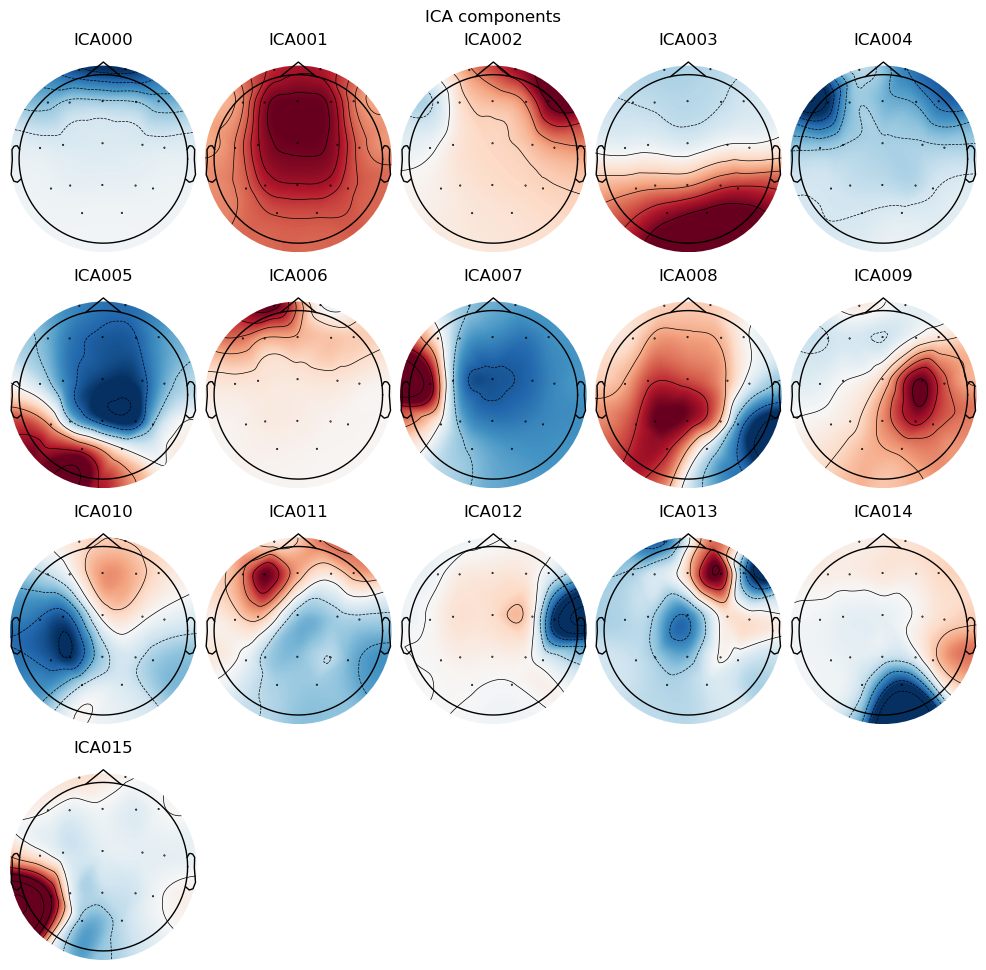

Using EOG channel: Fp1
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Removed notch frequencies (Hz):
     60.00 : 1254 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/67 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:02:54,937 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T4'], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['F7'], 'bad_all': ['F7', 'T4']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/67 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:02:58,376 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['C4', 'Cz', 'T4'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['C4', 'Cz', 'T4']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 16 sensor positions
Interpolating 3 sensors


2024-12-27 23:02:58,531 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/67 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:03:01,849 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T4'], 'bad_by_correlation': ['C4', 'Cz', 'T4'], 'bad_by_SNR': ['T4'], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['C4', 'Cz', 'T4']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 16 sensor positions
Interpolating 3 sensors


2024-12-27 23:03:01,989 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/67 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:03:05,222 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T4'], 'bad_by_correlation': ['C4', 'Cz', 'T4'], 'bad_by_SNR': ['T4'], 'bad_by_dropout': [], 'bad_by_ransac': ['Fp1'], 'bad_all': ['C4', 'Fp1', 'Cz', 'T4']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 15 sensor positions
Interpolating 4 sensors


2024-12-27 23:03:05,362 - pyprep.reference - INFO - Iterations: 3


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/67 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:03:08,767 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T4'], 'bad_by_correlation': ['C4', 'Cz', 'T4'], 'bad_by_SNR': ['T4'], 'bad_by_dropout': [], 'bad_by_ransac': ['Fp1'], 'bad_all': ['C4', 'Fp1', 'Cz', 'T4']}
2024-12-27 23:03:08,768 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 15 sensor positions
Interpolating 4 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/67 [00:00<?,       ?it/s]


RANSAC done!
Found 1 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

1 by HF noise: ['T4']

1 by correlation: ['T4']

1 by SNR: ['T4']

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 18 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/67 [00:00<?,       ?it/s]


RANSAC done!
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 18 sensor positions
Interpolating 1 sensors
Not setting metadata
19 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 19 events and 1025 original time points ...
0 bad epochs dropped
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window si

2024-12-27 23:03:20,080 - pyxdf.pyxdf - INFO - Importing XDF file c:\Users\Jake\testing-learning2024\git-test\EMAData\Sub1_session3_block.xdf...


Processing file: Sub1_session3_block.xdf for subject: Sub1_session3_block


2024-12-27 23:03:20,342 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2024-12-27 23:03:20,443 - pyxdf.pyxdf - INFO -   performing jitter removal...


Creating RawArray with float64 data, n_channels=19, n_times=88960
    Range : 0 ... 88959 =      0.000 ...   347.496 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 16 components
Fitting ICA took 0.9s.


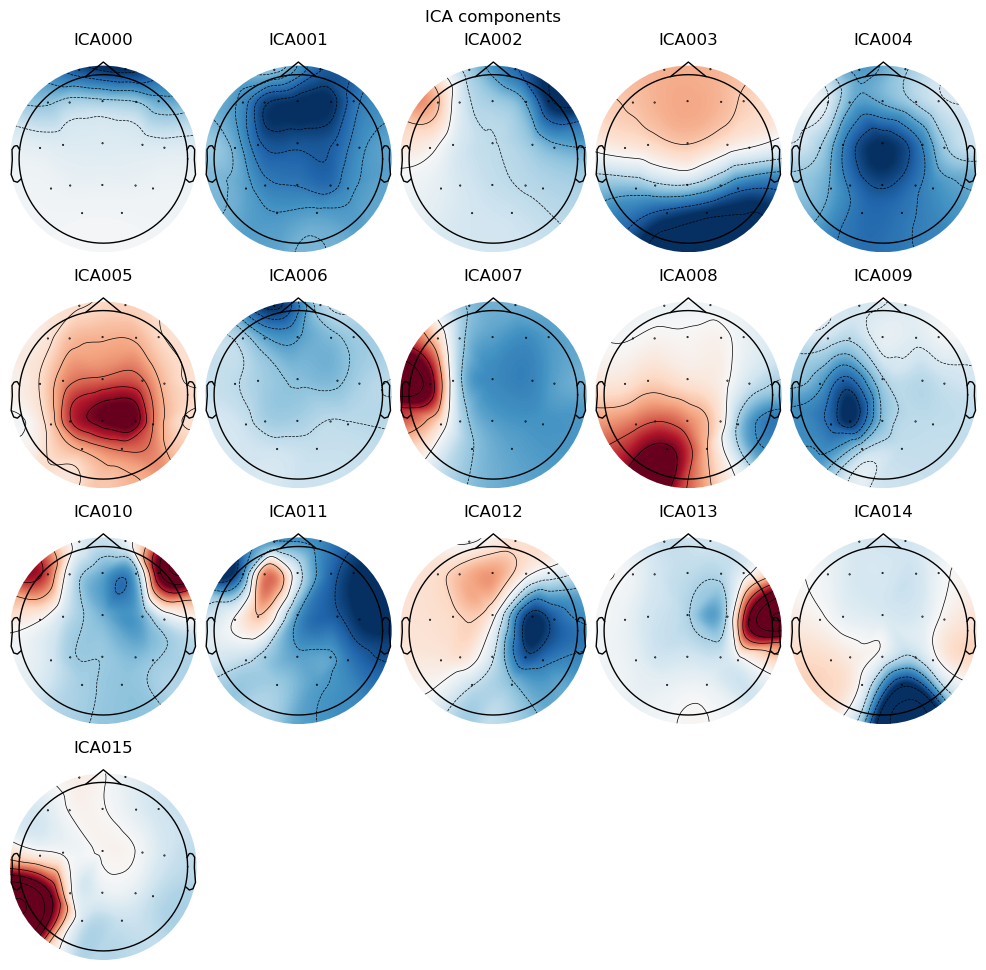

Using EOG channel: Fp1
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Removed notch frequencies (Hz):
     60.00 : 1292 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/69 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:03:30,261 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T4'], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T4']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/69 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:03:33,768 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['Fp1', 'Cz', 'T4'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['Fp1', 'Cz', 'T4']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 16 sensor positions
Interpolating 3 sensors


2024-12-27 23:03:33,907 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/69 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:03:37,374 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T4'], 'bad_by_correlation': ['Fp1', 'Cz', 'T4'], 'bad_by_SNR': ['T4'], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['Fp1', 'Cz', 'T4']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 16 sensor positions
Interpolating 3 sensors


2024-12-27 23:03:37,460 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/69 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:03:40,872 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T4'], 'bad_by_correlation': ['Fp1', 'Cz', 'T4'], 'bad_by_SNR': ['T4'], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['Fp1', 'Cz', 'T4']}
2024-12-27 23:03:40,873 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 16 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/69 [00:00<?,       ?it/s]


RANSAC done!
Found 2 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

1 by HF noise: ['T4']

2 by correlation: ['Fp1', 'T4']

1 by SNR: ['T4']

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 17 sensor positions
Interpolating 2 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/69 [00:00<?,       ?it/s]


RANSAC done!
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 17 sensor positions
Interpolating 2 sensors
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 1025 original time points ...
0 bad epochs dropped
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window si

2024-12-27 23:03:53,245 - pyxdf.pyxdf - INFO - Importing XDF file c:\Users\Jake\testing-learning2024\git-test\EMAData\Sub1_session4_block.xdf...


Processing file: Sub1_session4_block.xdf for subject: Sub1_session4_block


2024-12-27 23:03:53,499 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2024-12-27 23:03:53,577 - pyxdf.pyxdf - INFO -   performing jitter removal...


Creating RawArray with float64 data, n_channels=19, n_times=79328
    Range : 0 ... 79327 =      0.000 ...   309.871 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Selecting by number: 16 components
Fitting ICA took 1.1s.


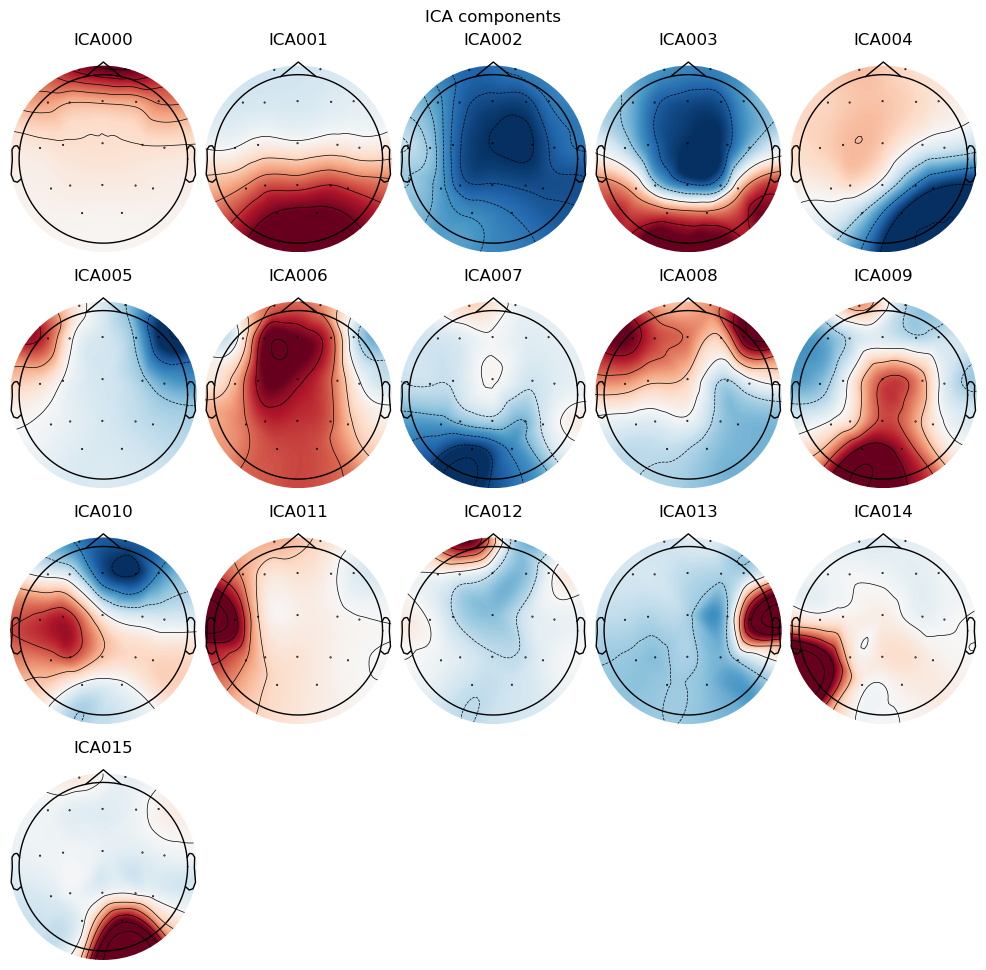

Using EOG channel: Fp1
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Removed notch frequencies (Hz):
     60.00 : 1140 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/61 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:04:03,478 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T4'], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T4']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/61 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:04:06,809 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T4'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['Fp1'], 'bad_all': ['Fp1', 'T4']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 17 sensor positions
Interpolating 2 sensors


2024-12-27 23:04:06,962 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/61 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:04:10,221 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T4'], 'bad_by_correlation': ['T4'], 'bad_by_SNR': ['T4'], 'bad_by_dropout': [], 'bad_by_ransac': ['Fp1'], 'bad_all': ['Fp1', 'T4']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 17 sensor positions
Interpolating 2 sensors


2024-12-27 23:04:10,357 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/61 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:04:13,714 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T4'], 'bad_by_correlation': ['T4'], 'bad_by_SNR': ['T4'], 'bad_by_dropout': [], 'bad_by_ransac': ['Fp1'], 'bad_all': ['Fp1', 'T4']}
2024-12-27 23:04:13,715 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 17 sensor positions
Interpolating 2 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/61 [00:00<?,       ?it/s]


RANSAC done!
Found 1 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

1 by HF noise: ['T4']

1 by correlation: ['T4']

1 by SNR: ['T4']

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 18 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/61 [00:00<?,       ?it/s]


RANSAC done!
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 18 sensor positions
Interpolating 1 sensors
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 1025 original time points ...
0 bad epochs dropped
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window si

2024-12-27 23:04:25,275 - pyxdf.pyxdf - INFO - Importing XDF file c:\Users\Jake\testing-learning2024\git-test\EMAData\Sub1_session5_block.xdf...


Processing file: Sub1_session5_block.xdf for subject: Sub1_session5_block


2024-12-27 23:04:25,510 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2024-12-27 23:04:25,596 - pyxdf.pyxdf - INFO -   performing jitter removal...


Creating RawArray with float64 data, n_channels=19, n_times=60384
    Range : 0 ... 60383 =      0.000 ...   235.871 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Selecting by number: 16 components
Fitting ICA took 0.8s.


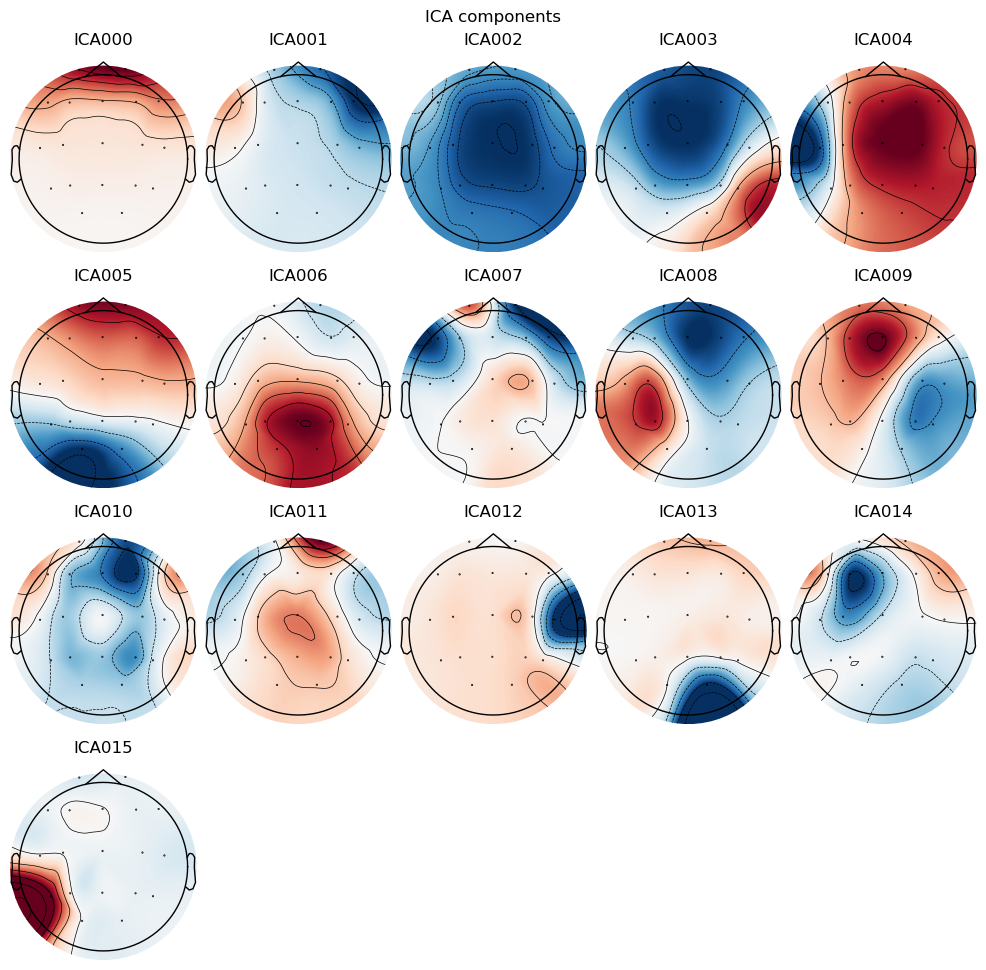

Using EOG channel: Fp1
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Removed notch frequencies (Hz):
     60.00 :  874 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/47 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:04:33,284 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['F7'], 'bad_all': ['F7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/47 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:04:35,809 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['Cz', 'T4'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['Fp1'], 'bad_all': ['Fp1', 'Cz', 'T4']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 16 sensor positions
Interpolating 3 sensors


2024-12-27 23:04:35,883 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/47 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:04:38,351 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T4'], 'bad_by_correlation': ['Fp1', 'Cz', 'T4'], 'bad_by_SNR': ['T4'], 'bad_by_dropout': [], 'bad_by_ransac': ['Fp1'], 'bad_all': ['Fp1', 'Cz', 'T4']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 16 sensor positions
Interpolating 3 sensors


2024-12-27 23:04:38,447 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/47 [00:00<?,       ?it/s]


RANSAC done!


2024-12-27 23:04:40,910 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T4'], 'bad_by_correlation': ['Fp1', 'Cz', 'T4'], 'bad_by_SNR': ['T4'], 'bad_by_dropout': [], 'bad_by_ransac': ['Fp1'], 'bad_all': ['Fp1', 'Cz', 'T4']}
2024-12-27 23:04:40,911 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 16 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/47 [00:00<?,       ?it/s]


RANSAC done!
Found 2 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

1 by HF noise: ['T4']

2 by correlation: ['Fp1', 'T4']

1 by SNR: ['T4']

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 17 sensor positions
Interpolating 2 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/47 [00:00<?,       ?it/s]


RANSAC done!
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 17 sensor positions
Interpolating 2 sensors
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 1025 original time points ...
0 bad epochs dropped
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window si

In [ ]:


# Directory containing the .xdf files
project_directory = os.path.dirname(os.path.abspath("EMA-anxiety-test"))
data_directory = os.path.join(project_directory, "EMAData")

# Create a list of all .xdf files in the directory
xdf_files = [f for f in os.listdir(data_directory) if f.endswith("block.xdf")]

# Function to preprocess EEG data
def preprocess_eeg(raw_eeg_data):
    # ICA for artifact removal
    raw_eeg_data.filter(l_freq=1.0, h_freq=40, fir_design='firwin')
    ica = ICA(n_components=16, random_state=42)
    ica.fit(raw_eeg_data)
    ica.plot_components()
    eog_inds, eog_scores = ica.find_bads_eog(raw_eeg_data, ch_name="Fp1")  # Adjust threshold as needed
    ica.exclude = eog_inds


    
    raw_eeg_data = ica.apply(raw_eeg_data)
    # Interpolation of bad channels
    montage = raw_eeg_data.get_montage()
    raw_eeg_data.load_data()

    prep_params = {
            "ref_chs": "eeg",  # Use all EEG channels for referencing
            "reref_chs": "eeg",  # Channels for final re-referencing
            "line_freqs": [60],  # Adjust for your location (50 Hz for Europe, 60 Hz for US)
        }
    prep = PrepPipeline(raw_eeg_data, prep_params, montage)
    prep.fit()
    raw_eeg_data.info["bads"] = prep.interpolated_channels  # Mark channels for interpolation
    raw_eeg_data.interpolate_bads()

    #raw_eeg_data = compute_current_source_density(raw_eeg_data)

    return raw_eeg_data


# Initialize a list to store results for all subjects
all_subjects_results = []

# Process each .xdf file
for xdf_file in xdf_files:
    # Extract the subject ID from the filename
    subject_id = os.path.splitext(xdf_file)[0]

    print(f"Processing file: {xdf_file} for subject: {subject_id}")

    # Load the XDF file
    streams, header = load_xdf(os.path.join(data_directory, xdf_file))

    # Extract EEG data stream
    eeg_stream = next((s for s in streams if s['info']['type'][0] == 'EEG'), None)
    eeg_data = np.array(eeg_stream['time_series']).T  # Transpose to channels x samples
    sfreq = float(eeg_stream['info']['nominal_srate'][0])  # Sampling frequency
    ch_names = [ch['label'][0] for ch in eeg_stream['info']['desc'][0]['channels'][0]['channel']]

    # Create MNE Raw object
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
    raw_eeg_data = mne.io.RawArray(eeg_data, info)
    montage = mne.channels.make_standard_montage('standard_1020')
    raw_eeg_data.set_montage(montage)

    # Extract Marker Stream and Annotations
    marker_stream = next((s for s in streams if s['info']['type'][0] == 'Markers'), None)
    markers = [m[0] for m in marker_stream['time_series']]
    marker_timestamps = marker_stream['time_stamps']
    eeg_timestamps = eeg_stream['time_stamps']

    annotations = mne.Annotations(
        onset=marker_timestamps - eeg_timestamps[0],
        duration=[0] * len(marker_timestamps),
        description=markers
    )
    raw_eeg_data.set_annotations(annotations)

    # Preprocess the EEG data
    processed_eeg = preprocess_eeg(raw_eeg_data)

    raw_eeg_data.plot(title="raw data with markers", scalings='auto')

    processed_eeg.plot(title="preprocessed data with markers", scalings='auto')

    # Extract "marker update" events for analysis
    update_markers = [
        (json.loads(desc).get("marker update"), json.loads(desc).get("user input"), onset)
        for desc, onset in zip(annotations.description, annotations.onset)
        if "marker update" in json.loads(desc)
    ]

    # Create events based on "marker update" annotations
    event_id = {name: idx + 1 for idx, (name, _, _) in enumerate(update_markers)}
    filtered_events = [
        [int(onset * processed_eeg.info['sfreq']), 0, event_id[name]]
        for name, _, onset in update_markers
    ]
    events = np.array(filtered_events)

    # Create epochs aligned with the filtered events
    tmin, tmax = -4.0, 0.0  # Define epoch time window
    epochs = mne.Epochs(processed_eeg, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, preload=True)
    
    epochs.plot(title="epochs -4s to 0s (marker onset)", scalings='auto')
    
    # Process each epoch to calculate aperiodic exponent and map to user input
    subject_results = []
    for epoch_idx, (epoch, event) in enumerate(zip(epochs.get_data(), epochs.events)):
        try:
            # Compute PSD
            psd, freqs = psd_array_welch(epoch, fmin=1, fmax=50, sfreq=epochs.info['sfreq'], average='mean')

            # Fit FOOOFGroup to extract aperiodic exponents
            fg = FOOOFGroup(peak_width_limits=(2, 8))
            fg.fit(freqs, psd)
            aperiodic_exponents = fg.get_params('aperiodic_params', col='exponent')
            avg_aperiodic_exponent = np.mean(aperiodic_exponents)

            # Match the marker name to its user input
            event_marker = list(event_id.keys())[list(event_id.values()).index(event[2])]
            user_input = next(
                (input_value for name, input_value, _ in update_markers if name == event_marker),
                None
            )

            # Append results for this epoch
            subject_results.append({
                "Subject ID": subject_id,
                "Epoch Index": epoch_idx,
                "Marker Name": event_marker,
                "Anxiety Rating": user_input,
                "Average Aperiodic Exponent": avg_aperiodic_exponent
            })
        except Exception as e:
            print(f"Error processing epoch {epoch_idx} for subject {subject_id}: {e}")

    # Save subject's results to all results
    all_subjects_results.extend(subject_results)

    # Optionally save individual subject results to a CSV
    subject_df = pd.DataFrame(subject_results)

# Combine all results into a single DataFrame
all_results_df = pd.DataFrame(all_subjects_results)

# Display the combined results
print(all_results_df.head())


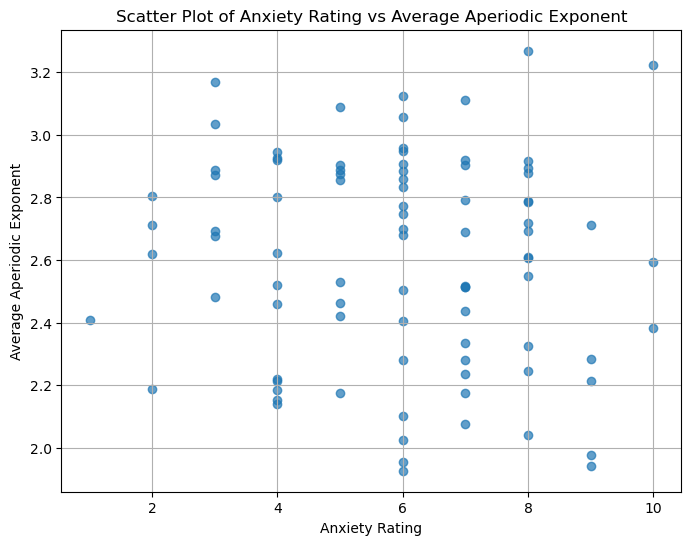

,Subject ID,Epoch Index,Marker Name,Anxiety Rating,Average Aperiodic Exponent
0,Sub1_session1_block,0,Marker_1,5,2.856747
1,Sub1_session1_block,1,Marker_2,6,2.747443
2,Sub1_session1_block,2,Marker_3,6,2.679953
3,Sub1_session1_block,3,Marker_4,7,2.691116
4,Sub1_session1_block,4,Marker_5,4,2.519708
...,...,...,...,...,...
83,Sub1_session5_block,15,Marker_16,3,2.870676
84,Sub1_session5_block,16,Marker_17,2,2.619355
85,Sub1_session5_block,17,Marker_18,3,2.481403
86,Sub1_session5_block,18,Marker_19,7,2.791410


Channels marked as bad:
none
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [19]:
all_results_df.head()
df = all_results_df
plt.figure(figsize=(8, 6))
plt.scatter(df["Anxiety Rating"], df["Average Aperiodic Exponent"], alpha=0.7)
plt.title("Scatter Plot of Anxiety Rating vs Average Aperiodic Exponent")
plt.xlabel("Anxiety Rating")
plt.ylabel("Average Aperiodic Exponent")
plt.grid(True)
plt.show()
all_results_df

## w/o preprocessing--

In [20]:
import os
import numpy as np
import pandas as pd
from mne import Annotations, events_from_annotations, Epochs
from mne.time_frequency import psd_array_welch
from fooof import FOOOFGroup
import json
from pyxdf import load_xdf

# Directory containing the .xdf files
project_directory = os.path.dirname(os.path.abspath("EMA-anxiety-test"))
data_directory = os.path.join(project_directory, "EMAData")

# Create a list of all .xdf files in the directory
xdf_files = [f for f in os.listdir(data_directory) if f.endswith("block.xdf")]

# Initialize a list to store results for all subjects
all_subjects_results = []

# Process each .xdf file
for xdf_file in xdf_files:
    # Extract the subject ID from the filename
    subject_id = os.path.splitext(xdf_file)[0]

    print(f"Processing file: {xdf_file} for subject: {subject_id}")

    # Load the XDF file
    streams, header = load_xdf(os.path.join(data_directory, xdf_file))

    # Extract EEG data stream
    eeg_stream = next((s for s in streams if s['info']['type'][0] == 'EEG'), None)
    eeg_data = np.array(eeg_stream['time_series']).T  # Transpose to channels x samples
    sfreq = float(eeg_stream['info']['nominal_srate'][0])  # Sampling frequency
    ch_names = [ch['label'][0] for ch in eeg_stream['info']['desc'][0]['channels'][0]['channel']]

    # Create MNE Raw object
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
    raw_eeg_data = mne.io.RawArray(eeg_data, info)
    montage = mne.channels.make_standard_montage('standard_1020')
    raw_eeg_data.set_montage(montage)

    # Extract Marker Stream and Annotations
    marker_stream = next((s for s in streams if s['info']['type'][0] == 'Markers'), None)
    markers = [m[0] for m in marker_stream['time_series']]
    marker_timestamps = marker_stream['time_stamps']
    eeg_timestamps = eeg_stream['time_stamps']

    annotations = Annotations(
        onset=marker_timestamps - eeg_timestamps[0],
        duration=[0] * len(marker_timestamps),
        description=markers
    )
    raw_eeg_data.set_annotations(annotations)

    # Filter only "marker update" annotations
    update_markers = [
        (json.loads(desc).get("marker update"), json.loads(desc).get("user input"), onset)
        for desc, onset in zip(annotations.description, annotations.onset)
        if "marker update" in json.loads(desc)
    ]

    # Create events based on "marker update" annotations
    event_id = {name: idx + 1 for idx, (name, _, _) in enumerate(update_markers)}
    filtered_events = [
        [int(onset * raw_eeg_data.info['sfreq']), 0, event_id[name]]
        for name, _, onset in update_markers
    ]
    events = np.array(filtered_events)

    # Create Epochs
    tmin, tmax = -4.0, 0.0  # Define epoch time window
    epochs = Epochs(raw_eeg_data, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, preload=True)

    # Process each epoch to calculate aperiodic exponent and map to user input
    subject_results = []
    for epoch_idx, (epoch, event) in enumerate(zip(epochs.get_data(), epochs.events)):
        try:
            # Compute PSD
            psd, freqs = psd_array_welch(epoch, fmin=1, fmax=50, sfreq=epochs.info['sfreq'], average='mean')

            # Fit FOOOFGroup to extract aperiodic exponents
            fg = FOOOFGroup(peak_width_limits=(2, 8))
            fg.fit(freqs, psd)
            aperiodic_exponents = fg.get_params('aperiodic_params', col='exponent')
            avg_aperiodic_exponent = np.mean(aperiodic_exponents)

            # Match the marker name to its user input
            event_marker = list(event_id.keys())[list(event_id.values()).index(event[2])]
            user_input = next(
                (input_value for name, input_value, _ in update_markers if name == event_marker),
                None
            )

            # Append results for this epoch
            subject_results.append({
                "Subject ID": subject_id,
                "Epoch Index": epoch_idx,
                "Marker Name": event_marker,
                "Anxiety Rating": user_input,
                "Average Aperiodic Exponent": avg_aperiodic_exponent
            })
        except Exception as e:
            print(f"Error processing epoch {epoch_idx} for subject {subject_id}: {e}")

    # Save subject's results to all results
    all_subjects_results.extend(subject_results)

    # Optionally save individual subject results to a CSV
    subject_df = pd.DataFrame(subject_results)

# Combine all results into a single DataFrame
all_results_df = pd.DataFrame(all_subjects_results)

# Display the combined results
all_results_df.head()
 

2024-12-28 00:18:57,656 - pyxdf.pyxdf - INFO - Importing XDF file c:\Users\Jake\testing-learning2024\git-test\EMAData\Sub1_session1_block.xdf...


Processing file: Sub1_session1_block.xdf for subject: Sub1_session1_block


2024-12-28 00:18:57,914 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2024-12-28 00:18:58,035 - pyxdf.pyxdf - INFO -   performing jitter removal...


Creating RawArray with float64 data, n_channels=19, n_times=48672
    Range : 0 ... 48671 =      0.000 ...   190.121 secs
Ready.
Not setting metadata
9 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 9 events and 1025 original time points ...
0 bad epochs dropped
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FO

2024-12-28 00:19:00,201 - pyxdf.pyxdf - INFO - Importing XDF file c:\Users\Jake\testing-learning2024\git-test\EMAData\Sub1_session2_block.xdf...


Processing file: Sub1_session2_block.xdf for subject: Sub1_session2_block


2024-12-28 00:19:00,472 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2024-12-28 00:19:00,559 - pyxdf.pyxdf - INFO -   performing jitter removal...


Creating RawArray with float64 data, n_channels=19, n_times=86624
    Range : 0 ... 86623 =      0.000 ...   338.371 secs
Ready.
Not setting metadata
19 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 19 events and 1025 original time points ...
0 bad epochs dropped
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running 

2024-12-28 00:19:04,005 - pyxdf.pyxdf - INFO - Importing XDF file c:\Users\Jake\testing-learning2024\git-test\EMAData\Sub1_session3_block.xdf...


Processing file: Sub1_session3_block.xdf for subject: Sub1_session3_block


2024-12-28 00:19:04,291 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2024-12-28 00:19:04,369 - pyxdf.pyxdf - INFO -   performing jitter removal...


Creating RawArray with float64 data, n_channels=19, n_times=88960
    Range : 0 ... 88959 =      0.000 ...   347.496 secs
Ready.
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 1025 original time points ...
0 bad epochs dropped
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running 

2024-12-28 00:19:07,770 - pyxdf.pyxdf - INFO - Importing XDF file c:\Users\Jake\testing-learning2024\git-test\EMAData\Sub1_session4_block.xdf...


Processing file: Sub1_session4_block.xdf for subject: Sub1_session4_block


2024-12-28 00:19:08,016 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2024-12-28 00:19:08,095 - pyxdf.pyxdf - INFO -   performing jitter removal...


Creating RawArray with float64 data, n_channels=19, n_times=79328
    Range : 0 ... 79327 =      0.000 ...   309.871 secs
Ready.
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 1025 original time points ...
0 bad epochs dropped
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running 

2024-12-28 00:19:11,339 - pyxdf.pyxdf - INFO - Importing XDF file c:\Users\Jake\testing-learning2024\git-test\EMAData\Sub1_session5_block.xdf...


Processing file: Sub1_session5_block.xdf for subject: Sub1_session5_block


2024-12-28 00:19:11,520 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2024-12-28 00:19:11,595 - pyxdf.pyxdf - INFO -   performing jitter removal...


Creating RawArray with float64 data, n_channels=19, n_times=60384
    Range : 0 ... 60383 =      0.000 ...   235.871 secs
Ready.
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 1025 original time points ...
0 bad epochs dropped
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.000 (s)
Running 

,Subject ID,Epoch Index,Marker Name,Anxiety Rating,Average Aperiodic Exponent
0,Sub1_session1_block,0,Marker_1,5,2.118309
1,Sub1_session1_block,1,Marker_2,6,2.313891
2,Sub1_session1_block,2,Marker_3,6,2.090884
3,Sub1_session1_block,3,Marker_4,7,2.173357
4,Sub1_session1_block,4,Marker_5,4,2.287894


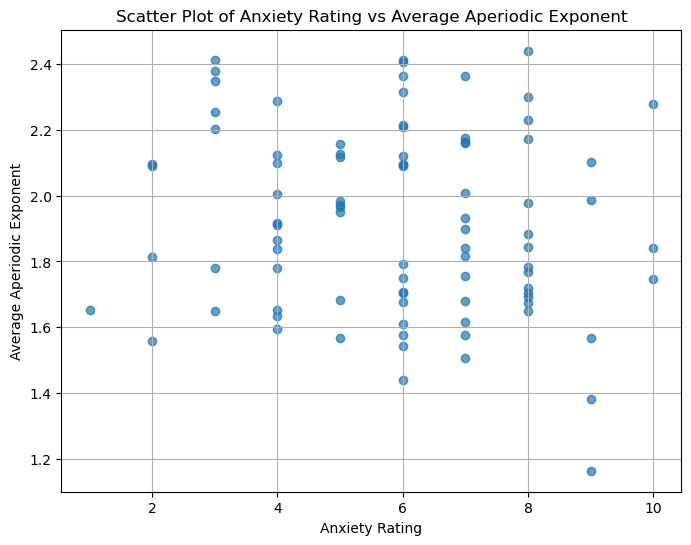

,Subject ID,Epoch Index,Marker Name,Anxiety Rating,Average Aperiodic Exponent
0,Sub1_session1_block,0,Marker_1,5,2.118309
1,Sub1_session1_block,1,Marker_2,6,2.313891
2,Sub1_session1_block,2,Marker_3,6,2.090884
3,Sub1_session1_block,3,Marker_4,7,2.173357
4,Sub1_session1_block,4,Marker_5,4,2.287894
...,...,...,...,...,...
83,Sub1_session5_block,15,Marker_16,3,2.347387
84,Sub1_session5_block,16,Marker_17,2,2.095752
85,Sub1_session5_block,17,Marker_18,3,1.780146
86,Sub1_session5_block,18,Marker_19,7,2.363590


In [21]:
all_results_df.head()
df = all_results_df
plt.figure(figsize=(8, 6))
plt.scatter(df["Anxiety Rating"], df["Average Aperiodic Exponent"], alpha=0.7)
plt.title("Scatter Plot of Anxiety Rating vs Average Aperiodic Exponent")
plt.xlabel("Anxiety Rating")
plt.ylabel("Average Aperiodic Exponent")
plt.grid(True)
plt.show()
all_results_df

# Experiment 2 -- markers sent based on unprompted user input

In [18]:
# Create the marker stream
info = StreamInfo(name='MarkerStream', type='Markers', channel_count=1, nominal_srate=0, channel_format='string')
outlet = StreamOutlet(info)

# Find all available streams
streams = resolve_stream()

inlet = StreamInlet(streams[0])

# Print details of each stream found
for i, stream in enumerate(streams):
    print(f"Stream {i + 1}:")
    print(f"  Name: {stream.name()}")
    print(f"  Type: {stream.type()}")
    print(f"  Source ID: {stream.source_id()}")
    print(f"  Channels: {stream.channel_count()}")
    print(f"  Sampling Rate: {stream.nominal_srate()} Hz")
    print()

Stream 1:
  Name: MarkerStream
  Type: Markers
  Source ID: 
  Channels: 1
  Sampling Rate: 0.0 Hz

Stream 2:
  Name: Neuroeducation EEG
  Type: EEG
  Source ID: neuroEdu_JakeTear
  Channels: 19
  Sampling Rate: 256.0 Hz



In [19]:

# Momentary assessment paradigm
try:
    print("Starting 5-minute recording...")
    start_time = time.time()
    recording_duration = 5*60   # 5 minutes in seconds
    marker_counter = 1
    while time.time() - start_time < recording_duration:
        # Wait for user input (1-10)
        try:
            print("Please input a number (1-10):")
            user_input = int(input())
            if 1 <= user_input <= 10:
                # Send marker with user input
                marker_name = f"User_Input_{user_input}"
                metadata = json.dumps({"marker": marker_counter, "user input": user_input})
                outlet.push_sample([metadata])
                print(f"Sent marker: {metadata}")
                marker_counter += 1
                # Play beep upon input
                Beep(300, 200)

                # Wait 4 seconds and play another beep
                time.sleep(4)
                Beep(300, 200)
            else:
                print("Invalid input. Please enter a number between 1 and 10.")
        except ValueError:
            print("Invalid input. Please enter a valid number between 1 and 10.")

    # Play beep at the end of 5 minutes
    print("5-minute recording ended.")
    Beep(300, 1000)
except KeyboardInterrupt:
    print("Recording terminated.")


Starting 5-minute recording...
Please input a number (1-10):
Sent marker: {"marker": 1, "user input": 7}
Please input a number (1-10):
Sent marker: {"marker": 2, "user input": 7}
Please input a number (1-10):
Sent marker: {"marker": 3, "user input": 8}
Please input a number (1-10):
Invalid input. Please enter a valid number between 1 and 10.
Please input a number (1-10):
Sent marker: {"marker": 4, "user input": 6}
Please input a number (1-10):
Sent marker: {"marker": 5, "user input": 3}
Please input a number (1-10):
Sent marker: {"marker": 6, "user input": 3}
Please input a number (1-10):
Sent marker: {"marker": 7, "user input": 8}
Please input a number (1-10):
Sent marker: {"marker": 8, "user input": 7}
Please input a number (1-10):
Sent marker: {"marker": 9, "user input": 4}
Please input a number (1-10):
Sent marker: {"marker": 10, "user input": 2}
Please input a number (1-10):
Sent marker: {"marker": 11, "user input": 5}
Please input a number (1-10):
Sent marker: {"marker": 12, "use

## Analysis

### W/O preprocessing

In [70]:
project_directory = os.path.dirname(os.path.abspath("EMA-anxiety-test"))
data_directory = os.path.join(project_directory, "EMAData")

# Create a list of all .xdf files in the directory
xdf_files = [f for f in os.listdir(data_directory) if f.endswith("block1.xdf")]

# Initialize a list to store results for all subjects
all_subjects_results = []

# Process each .xdf file
for xdf_file in xdf_files:
    # Extract the subject ID from the filename
    filename_parts = os.path.splitext(xdf_file)[0].split('_')
    subject_id = filename_parts[0]  # e.g., "Sub1"
    session_id = filename_parts[1]  # e.g., "Session1"

    print(f"Processing file: {xdf_file} for {subject_id}, {session_id}")

    # Load the XDF file
    streams, header = load_xdf(os.path.join(data_directory, xdf_file), verbose=False)

    # Extract EEG data stream
    eeg_stream = next((s for s in streams if s['info']['type'][0] == 'EEG'), None)
    eeg_data = np.array(eeg_stream['time_series']).T  # Transpose to channels x samples
    sfreq = float(eeg_stream['info']['nominal_srate'][0])  # Sampling frequency
    ch_names = [ch['label'][0] for ch in eeg_stream['info']['desc'][0]['channels'][0]['channel']]

    # Create MNE Raw object
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
    raw_eeg_data = mne.io.RawArray(eeg_data, info, verbose=False)
    montage = mne.channels.make_standard_montage('standard_1020')
    raw_eeg_data.set_montage(montage)

    # Extract Marker Stream and Annotations
    marker_stream = next((s for s in streams if s['info']['type'][0] == 'Markers'), None)
    markers = [m[0] for m in marker_stream['time_series']]
    marker_timestamps = marker_stream['time_stamps']
    eeg_timestamps = eeg_stream['time_stamps']


    annotations = mne.Annotations(
        onset=marker_timestamps - eeg_timestamps[0],  # Time relative to EEG start
        duration=[0] * len(marker_timestamps),       # Duration for each annotation
        description=markers   # Empty descriptions for simplicity
    )
    raw_eeg_data.set_annotations(annotations)

    raw_eeg_data.plot(title=f"Raw Data with Markers for {session_id}", scalings='auto', verbose=False)

    # Parse user inputs from marker descriptions
    user_inputs = [
        json.loads(m).get("user input", None) for m in markers
    ]

    # Create events array sequentially
    events = [
        [int(onset * raw_eeg_data.info['sfreq']), 0, idx + 1]
        for idx, onset in enumerate(marker_timestamps - eeg_timestamps[0])
    ]
    events = np.array(events)


    # Create Epochs
    tmin, tmax = -4.0, 0.0  # Define epoch time window (before the event)
    epochs = mne.Epochs(raw_eeg_data, events, event_id=None, tmin=tmin, tmax=tmax, baseline=None, preload=True, verbose=False)

    # Process each epoch to calculate aperiodic exponent and associate user input
    subject_results = []
    for epoch_idx, (epoch, user_input) in enumerate(zip(epochs.get_data(), user_inputs)):
        try:
            # Compute PSD
            psd, freqs = psd_array_welch(epoch, fmin=1, fmax=50, sfreq=epochs.info['sfreq'], average='mean', verbose=False)

            # Fit FOOOFGroup to extract aperiodic exponents
            fg = FOOOFGroup(peak_width_limits=(2, 8), verbose=False)
            fg.fit(freqs, psd)
            aperiodic_exponents = fg.get_params('aperiodic_params', col='exponent')
            avg_aperiodic_exponent = np.mean(aperiodic_exponents)

            # Append results for this epoch
            subject_results.append({
                "Subject ID": subject_id,
                "Session ID": session_id,
                "Epoch Index": epoch_idx,
                "User Input": user_input,
                "Average Aperiodic Exponent": avg_aperiodic_exponent
            })
        except Exception as e:
            print(f"Error processing epoch {epoch_idx} for subject {subject_id}: {e}")

    # Save subject's results to all results
    all_subjects_results.extend(subject_results)

# Combine all results into a single DataFrame
all_results_df = pd.DataFrame(all_subjects_results)

# Display the combined results
print(all_results_df)

Processing file: Sub1_session1_block1.xdf for Sub1, session1
Processing file: Sub1_session2_block1.xdf for Sub1, session2
Processing file: Sub1_session3_block1.xdf for Sub1, session3
   Subject ID Session ID  Epoch Index  User Input  Average Aperiodic Exponent
0        Sub1   session1            0           5                    1.515242
1        Sub1   session1            1           6                    1.569222
2        Sub1   session1            2           5                    1.613648
3        Sub1   session1            3           7                    1.449222
4        Sub1   session1            4           3                    1.508164
5        Sub1   session1            5           4                    1.669605
6        Sub1   session1            6           4                    1.461102
7        Sub1   session1            7           4                    1.446696
8        Sub1   session1            8           6                    1.579330
9        Sub1   session1            9

C:\Users\Jake\AppData\Local\Temp\ipykernel_4712\748582662.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(unique_sessions))  # Use a colormap for distinct colors


['session1' 'session2' 'session3']


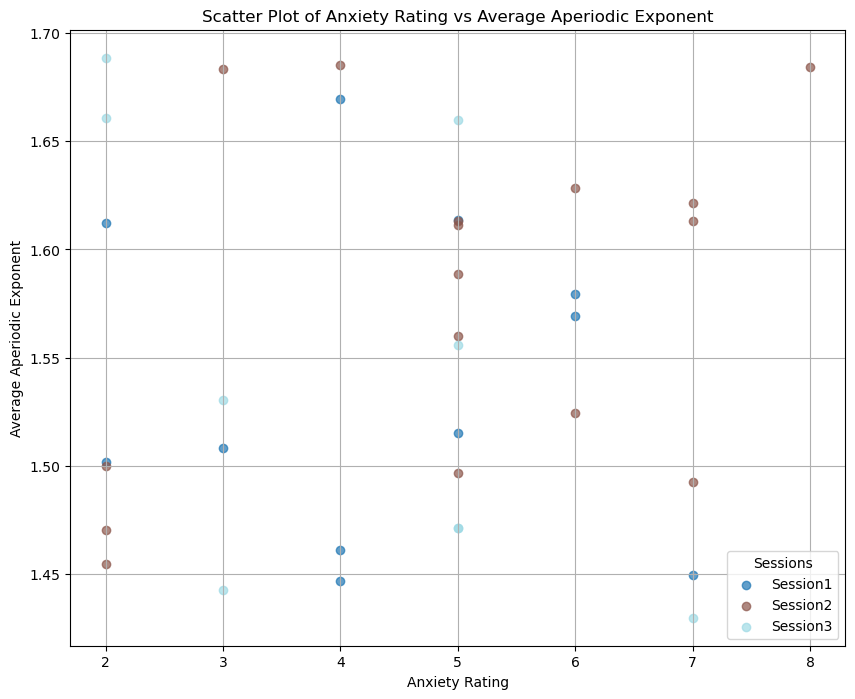

In [76]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

df = all_results_df

# Ensure the DataFrame has the relevant columns for plotting
if {"Session ID", "User Input", "Average Aperiodic Exponent"}.issubset(df.columns):
    # Get unique session IDs and generate unique colors for each session
    unique_sessions = df["Session ID"].unique()
    colors = cm.get_cmap('tab20', len(unique_sessions))  # Use a colormap for distinct colors
    print(unique_sessions)
    # Plot each session
    plt.figure(figsize=(10, 8))
    for idx, session in enumerate(unique_sessions):
        session_data = df[df["Session ID"] == session]
        plt.scatter(
            session_data["User Input"], session_data["Average Aperiodic Exponent"],
            color=colors(idx), alpha=0.7, label=f"{session.capitalize()}"
        )

    # Customize the plot
    plt.title("Scatter Plot of Anxiety Rating vs Average Aperiodic Exponent")
    plt.xlabel("Anxiety Rating")
    plt.ylabel("Average Aperiodic Exponent")
    plt.legend(title="Sessions")
    plt.grid(True)
    plt.show()
else:
    print("Required columns are missing in the DataFrame.")


### W/ preprocessing

In [20]:
def preprocess_raw(raw_eeg_data):
    # ICA for artifact removal
    raw_eeg_data.filter(l_freq=1.0, h_freq=40, fir_design='firwin', verbose=False)
    ica = ICA(n_components=15, random_state=97, max_iter=800)
    ica.fit(raw_eeg_data)

    eog_indices, eog_scores = ica.find_bads_eog(raw_eeg_data, ch_name=['Fp1', 'Fp2'])


    ica.exclude = eog_indices

    raw_eeg_data = ica.apply(raw_eeg_data)
    
    # Interpolation of bad channels
    # montage = raw_eeg_data.get_montage()
    # raw_eeg_data.load_data()

    # prep_params = {
    #         "ref_chs": "eeg",  # Use all EEG channels for referencing
    #         "reref_chs": "eeg",  # Channels for final re-referencing
    #         "line_freqs": [60],  # Adjust for your location (50 Hz for Europe, 60 Hz for US)
    #     }
    # prep = PrepPipeline(raw_eeg_data, prep_params, montage)
    # prep.fit()
    # raw_eeg_data.info["bads"] = prep.interpolated_channels  # Mark channels for interpolation
    # raw_eeg_data.interpolate_bads()

    #raw_eeg_data = compute_current_source_density(raw_eeg_data)

    return raw_eeg_data

project_directory = os.path.dirname(os.path.abspath("EMA-anxiety-test"))
data_directory = os.path.join(project_directory, "EMAData")

# Create a list of all .xdf files in the directory
xdf_files = [f for f in os.listdir(data_directory) if f.endswith("block1.xdf")]

# Initialize a list to store results for all subjects
all_subjects_results = []

# Process each .xdf file
for xdf_file in xdf_files:
    # Extract the subject ID from the filename
    filename_parts = os.path.splitext(xdf_file)[0].split('_')
    subject_id = filename_parts[0]  # e.g., "Sub1"
    session_id = filename_parts[1]  # e.g., "Session1"

    print(f"Processing file: {xdf_file} for {subject_id}, {session_id}")

    # Load the XDF file
    streams, header = load_xdf(os.path.join(data_directory, xdf_file), verbose=False)

    # Extract EEG data stream
    eeg_stream = next((s for s in streams if s['info']['type'][0] == 'EEG'), None)
    eeg_data = np.array(eeg_stream['time_series']).T  # Transpose to channels x samples
    sfreq = float(eeg_stream['info']['nominal_srate'][0])  # Sampling frequency
    ch_names = [ch['label'][0] for ch in eeg_stream['info']['desc'][0]['channels'][0]['channel']]

    # Create MNE Raw object
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
    raw_eeg_data = mne.io.RawArray(eeg_data, info, verbose=False)
    montage = mne.channels.make_standard_montage('standard_1020')
    raw_eeg_data.set_montage(montage)

    raw_eeg_data = preprocess_raw(raw_eeg_data)

    # Extract Marker Stream and Annotations
    marker_stream = next((s for s in streams if s['info']['type'][0] == 'Markers'), None)
    markers = [m[0] for m in marker_stream['time_series']]
    marker_timestamps = marker_stream['time_stamps']
    eeg_timestamps = eeg_stream['time_stamps']


    annotations = mne.Annotations(
        onset=marker_timestamps - eeg_timestamps[0],  # Time relative to EEG start
        duration=[0] * len(marker_timestamps),       # Duration for each annotation
        description=markers   # Empty descriptions for simplicity
    )
    raw_eeg_data.set_annotations(annotations)

    raw_eeg_data.plot(title=f"Raw Data with Markers for {session_id}", scalings='auto', verbose=False)

    # Parse user inputs from marker descriptions
    user_inputs = [
        json.loads(m).get("user input", None) for m in markers
    ]

    # Create events array sequentially
    events = [
        [int(onset * raw_eeg_data.info['sfreq']), 0, idx + 1]
        for idx, onset in enumerate(marker_timestamps - eeg_timestamps[0])
    ]
    events = np.array(events)


    # Create Epochs
    tmin, tmax = -4.0, 0.0  # Define epoch time window (before the event)
    epochs = mne.Epochs(raw_eeg_data, events, event_id=None, tmin=tmin, tmax=tmax, baseline=None, preload=True, verbose=False)

    # Process each epoch to calculate aperiodic exponent and associate user input
    subject_results = []
    for epoch_idx, (epoch, user_input) in enumerate(zip(epochs.get_data(), user_inputs)):
        try:
            # Compute PSD
            psd, freqs = psd_array_welch(epoch, fmin=1, fmax=50, sfreq=epochs.info['sfreq'], average='mean', verbose=False)

            # Fit FOOOFGroup to extract aperiodic exponents
            fg = FOOOFGroup(peak_width_limits=(2, 8), verbose=False)
            fg.fit(freqs, psd)
            aperiodic_exponents = fg.get_params('aperiodic_params', col='exponent')
            avg_aperiodic_exponent = np.mean(aperiodic_exponents)

            # Append results for this epoch
            subject_results.append({
                "Subject ID": subject_id,
                "Session ID": session_id,
                "Epoch Index": epoch_idx,
                "User Input": user_input,
                "Average Aperiodic Exponent": avg_aperiodic_exponent
            })
        except Exception as e:
            print(f"Error processing epoch {epoch_idx} for subject {subject_id}: {e}")

    # Save subject's results to all results
    all_subjects_results.extend(subject_results)

# Combine all results into a single DataFrame
all_results_df = pd.DataFrame(all_subjects_results)

# Display the combined results
print(all_results_df)

Processing file: Sub1_session1_block1.xdf for Sub1, session1
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 0.9s.
Using EOG channels: Fp1, Fp2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- L

C:\Users\Jake\AppData\Local\Temp\ipykernel_17136\1921917152.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(unique_sessions))  # Use a colormap for distinct colors


['session1' 'session2' 'session3' 'session4' 'session5' 'session6'
 'session7']


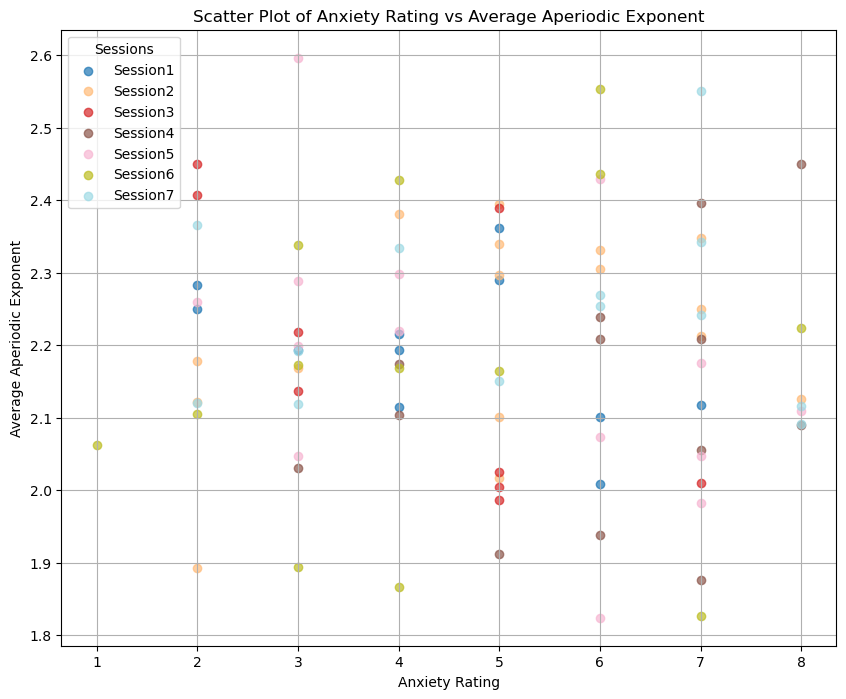

Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none


In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

df = all_results_df

# Ensure the DataFrame has the relevant columns for plotting
if {"Session ID", "User Input", "Average Aperiodic Exponent"}.issubset(df.columns):
    # Get unique session IDs and generate unique colors for each session
    unique_sessions = df["Session ID"].unique()
    colors = cm.get_cmap('tab20', len(unique_sessions))  # Use a colormap for distinct colors
    print(unique_sessions)
    # Plot each session
    plt.figure(figsize=(10, 8))
    for idx, session in enumerate(unique_sessions):
        session_data = df[df["Session ID"] == session]
        plt.scatter(
            session_data["User Input"], session_data["Average Aperiodic Exponent"],
            color=colors(idx), alpha=0.7, label=f"{session.capitalize()}"
        )

    # Customize the plot
    plt.title("Scatter Plot of Anxiety Rating vs Average Aperiodic Exponent")
    plt.xlabel("Anxiety Rating")
    plt.ylabel("Average Aperiodic Exponent")
    plt.legend(title="Sessions")
    plt.grid(True)
    plt.show()
else:
    print("Required columns are missing in the DataFrame.")

Slope: -0.0586
R-Squared: 0.0999
P-Value: 0.5416


C:\Users\Jake\AppData\Local\Temp\ipykernel_17136\1938257737.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['Aperiodic Bin']).agg({
C:\Users\Jake\AppData\Local\Temp\ipykernel_17136\1938257737.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Slope: {model.params[1]:.4f}")
C:\Users\Jake\AppData\Local\Temp\ipykernel_17136\1938257737.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print

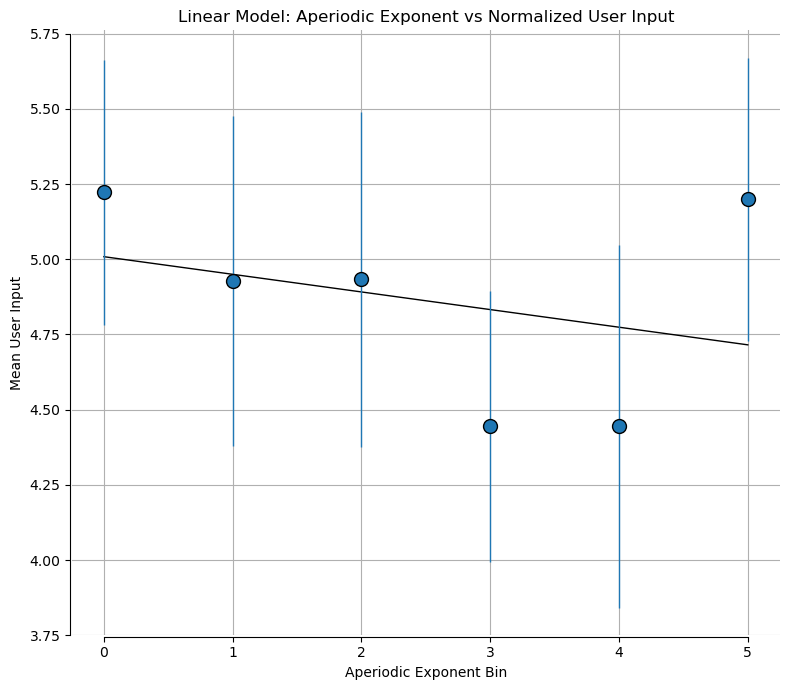

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from scipy.stats import sem

# Assuming df is all_results_df
df = all_results_df.copy()

# Configuration
n_bins = 6  # Number of bins for aperiodic exponent
cfg = {'n_bins': n_bins}

# Normalize data per session
df['Normalized Aperiodic Exponent'] = df.groupby('Session ID')['Average Aperiodic Exponent'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# Bin aperiodic exponent values per session
df['Aperiodic Bin'] = df.groupby('Session ID')['Normalized Aperiodic Exponent'].transform(
    lambda x: pd.cut(x, cfg['n_bins'], labels=range(cfg['n_bins']))
)

# Group data by bins
df_grouped = df.groupby(['Aperiodic Bin']).agg({
    'User Input': ['mean', sem]
}).reset_index()

# Flatten multi-level columns
df_grouped.columns = ['Aperiodic Bin', 'Mean User Input', 'SEM User Input']

# Run a linear model for combined data
poly_feat = PolynomialFeatures(degree=1)
x_poly = poly_feat.fit_transform(df_grouped['Aperiodic Bin'].to_numpy().reshape(-1, 1))
model = sm.OLS(df_grouped['Mean User Input'], x_poly).fit()

# Display model results
print(f"Slope: {model.params[1]:.4f}")
print(f"R-Squared: {model.rsquared:.4f}")
print(f"P-Value: {model.pvalues[1]:.4f}")


fig, ax = plt.subplots(figsize=(8, 7))

# Plot mean and SEM
ax.errorbar(
    df_grouped['Aperiodic Bin'],
    df_grouped['Mean User Input'],
    yerr=df_grouped['SEM User Input'],
    capsize=0,
    ls='None',
    marker='o',
    alpha=1,
    zorder=1000,
    ms=10,
    mew=1,
    elinewidth=1,
    markeredgecolor='k',
    label="Normalized Data"
)

# Add linear regression line
sns.regplot(
    x=df_grouped['Aperiodic Bin'],
    y=df_grouped['Mean User Input'],
    scatter=False,
    ax=ax,
    line_kws={'color': 'k', 'linestyle': '-', 'lw': 1},
    ci=None
)

# Customize plot
ax.set_title("Linear Model: Normalized Aperiodic Exponent per session vs User Input")
ax.set_xlabel("Aperiodic Exponent Bin")
ax.set_ylabel("Mean User Input")
sns.despine(ax=ax, offset=1, trim=True)
ax.grid(True) 

fig.tight_layout()
plt.show()
